# Step 1: Create SOTA MNIST Model

An absolutely unecessary appproach.

Create a dual handwritten-digit FizzBuzz model.

This program creates a SOTA-like MNIST model, then creates a new model
with a dual copy of the MNIST model with FizzBuzz output flags.

This code is based on the following code sources:
- The [Keras MNIST example](https://www.tensorflow.org/datasets/keras_example) (used in the dataset preparation)
- The [MNIST CNN SOTA model code](https://medium.com/@BrendanArtley/mnist-keras-simple-cnn-99-6-731b624aee7f) from [Brendan Artley](https://github.com/brendanartley/Medium-Article-Code/blob/main/code/mnist-keras-cnn-99-6.ipynb)

In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import clone_model, Model
from tensorflow.keras.datasets import mnist

import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:

# Load embedded MNIST data
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

# Normalize training data
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

# Normalize testing data
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

# Also manually load data for easy interactivity
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

2024-10-14 16:50:27.078796: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-14 16:50:27.121127: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-14 16:50:27.121153: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-14 16:50:27.123758: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-14 16:50:27.123786: I external/local_xla/xla/stream_executor

## Create SOTA Model 

Create a CNN model to evaluate the handwwritten digits.

From [Brendan Artley](https://medium.com/@BrendanArtley/mnist-keras-simple-cnn-99-6-731b624aee7f)

In [3]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last', input_shape=(28,28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [4]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=15,
    validation_data=ds_test,
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-10-14 16:50:58.190760: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-10-14 16:51:00.041461: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2024-10-14 16:51:01.540124: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f71e001ba10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-14 16:51:01.540156: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4

469/469 [==============================] - 15s 18ms/step - loss: 0.1872 - sparse_categorical_accuracy: 0.9451 - val_loss: 0.2862 - val_sparse_categorical_accuracy: 0.9222
Epoch 2/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0675 - sparse_categorical_accuracy: 0.9800 - val_loss: 0.0547 - val_sparse_categorical_accuracy: 0.9841
Epoch 3/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0493 - sparse_categorical_accuracy: 0.9847 - val_loss: 0.0292 - val_sparse_categorical_accuracy: 0.9900
Epoch 4/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0419 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.0246 - val_sparse_categorical_accuracy: 0.9917
Epoch 5/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0362 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.0203 - val_sparse_categorical_accuracy: 0.9944
Epoch 6/15
469/469 [==============================] - 8s 16ms/step - loss: 0.0323 - sparse_categorical_ac

In [6]:
# Save model
model.save('fizzbuzz_mnist_single.keras')

1/1 [==============================] - 0s 21ms/step
Results:
[[7.2236765e-14 5.3631177e-13 1.6973480e-13 4.7385598e-14 5.8497504e-12
  8.7207130e-11 1.0000000e+00 7.5902894e-17 5.6532400e-12 1.0887482e-17]]
Value: 6


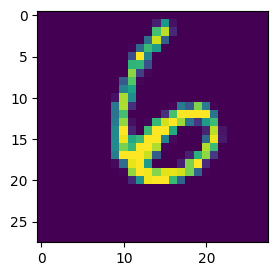

In [12]:
# test model

# Pick a random digit
# Note: Uses x_test for future validation; x_train used for smoke test
x = random.randint(0, len(x_train))  
v = x_train[x]
res = model.predict(np.expand_dims(v, axis=0))
print("Results:")
print(res)

# print highest digit
print("Value:", np.argmax(res))

fig, axes = plt.subplots(1,1,figsize=(3,3))

axes.imshow(v)
plt.show()

In [13]:
# If necessary, reload model for below debugging 
# model = tf.keras.saving.load_model('fizzbuzz_mnist_single.keras')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                        

# Step 2: Create super model with cloned models

Create two separate MNIST evaluators that will feed into a concatenator, followed by a dense group to calculate the Fizzbuzz.

In [15]:
# Freeze the existing layers
for layer in model.layers:
    layer.trainable = False

# We will clone the MNIST model to use it twice
model._name = 'copy1'
base_model1 = clone_model(model)
model._name = 'copy2'
base_model2 = clone_model(model)

# Load the previously trained weights
base_model1.set_weights(model.get_weights())
base_model2.set_weights(model.get_weights())

# Freeze the existing layers
for layer in base_model1.layers: layer.trainable = False
for layer in base_model2.layers: layer.trainable = False

# Define the inputs for two concurrent images
input1 = tf.keras.layers.Input(shape=(28, 28, 1), name='input1')
input2 = tf.keras.layers.Input(shape=(28, 28, 1), name='input2')

# Process each input image with the base CNN model
output1 = base_model1(input1)
output2 = base_model2(input2)

# Concatenate the outputs from the two models
combined = tf.keras.layers.Concatenate()([output1, output2])

# Adding dense layers to interpret Fizzbuzz
combined = tf.keras.layers.Flatten()(combined)
dense_output = tf.keras.layers.Dense(100, activation='sigmoid')(combined)
dense_output = tf.keras.layers.Dense(20, activation='relu')(dense_output)
dense_output = tf.keras.layers.Flatten()(dense_output)
dense_output = tf.keras.layers.Dense(2, activation='sigmoid')(dense_output)

# Create the new model with dual inputs
super_model = Model(inputs=[input1, input2], outputs=dense_output)

# Compile the model with appropriate loss and optimizer
super_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['binary_accuracy'], 
)

In [16]:
super_model.summary(show_trainable=True)

Model: "model"
_____________________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  Trainable  
 input1 (InputLayer)         [(None, 28, 28, 1)]          0         []                            Y          
                                                                                                             
 input2 (InputLayer)         [(None, 28, 28, 1)]          0         []                            Y          
                                                                                                             
 copy1 (Sequential)          (None, 10)                   2213610   ['input1[0][0]']              Y          
                                                                                                             
 copy2 (Sequential)          (None, 10)                   2213610   ['input2[0][0]']              Y      

In [17]:
# Reload data, if necessary
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255


def generate_batch(): # debug=False):
    """
    Creates a batch from numbers 00 to 99.

    For every number, picks two random representative digits, 
      calculates its fizzbuzz, returns the output.
    """

    # inputs = []
    inputs1 = []
    inputs2 = []
    labels = []
    number_locations = {}
    
    batch = 5 # number of sequences from 1 to 100 to be generated
    
    # find and organize digits
    for i in range(10):
        number_locations[i] = np.where(y_train == i)[0]

    for b in range(batch):
        for i in range(0, 100):
            tens = int(i / 10)
            ones = i % 10
        
            # pick an image from the list of digits
            first_digit  = number_locations[tens][np.random.choice(len(number_locations[tens]), size=1)][0]
            second_digit = number_locations[ones][np.random.choice(len(number_locations[ones]), size=1)][0]
            
            img0 = x_train[first_digit]
            img1 = x_train[second_digit]
    
            inputs1.append(img0)
            inputs2.append(img1)
            
    
            # Fizzbuzz classification
            fizz = 0
            buzz = 0
            if i % 3 == 0: fizz = 1
            if i % 5 == 0: buzz = 1
    
            # create fizzbuzz labels
            label = np.array([fizz, buzz]) #.reshape(2,1)
            labels.append(label)


    # Shuffle the output list 
    temp = list(zip(inputs1, inputs2, labels))
    random.shuffle(temp)
    inputs1, inputs2, labels = zip(*temp)
    inputs1, inputs2, labels = list(inputs1), list(inputs2), list(labels) 

    # Clean up outputs
    inputs1 = np.array(inputs1)
    inputs2 = np.array(inputs2)
    labels = np.array(labels)

    return inputs1, inputs2, labels


In [21]:
def data_generator():
    """
    Creates back to back sequences of fizzbuzz calculations, in batches, from 00 to 99
    """
    while True:
        # Generate batch of inputs and labels
        inputs1, inputs2, labels = generate_batch()  # Replace with your function
        yield [inputs1, inputs2], labels

# Use generator with fit()
super_model.fit(data_generator(), steps_per_epoch=100, epochs=15)

Epoch 1/15
100/100 [==============================] - 6s 28ms/step - loss: 0.5453 - binary_accuracy: 0.7300
Epoch 2/15
100/100 [==============================] - 3s 28ms/step - loss: 0.4266 - binary_accuracy: 0.7868
Epoch 3/15
100/100 [==============================] - 3s 29ms/step - loss: 0.3338 - binary_accuracy: 0.8293
Epoch 4/15
100/100 [==============================] - 3s 29ms/step - loss: 0.3071 - binary_accuracy: 0.8458
Epoch 5/15
100/100 [==============================] - 3s 28ms/step - loss: 0.2731 - binary_accuracy: 0.8985
Epoch 6/15
100/100 [==============================] - 3s 29ms/step - loss: 0.2037 - binary_accuracy: 0.9146
Epoch 7/15
100/100 [==============================] - 3s 28ms/step - loss: 0.1229 - binary_accuracy: 0.9814
Epoch 8/15
100/100 [==============================] - 3s 28ms/step - loss: 0.0694 - binary_accuracy: 0.9883
Epoch 9/15
100/100 [==============================] - 3s 29ms/step - loss: 0.0462 - binary_accuracy: 0.9965
Epoch 10/15
100/100 [=======

In [22]:
model.save('fizzbuzz_mnist_fizzbuzz.keras')

# Test Model
Select two values from the testing data, and infer the fizzbuzz output.

1/1 [==============================] - 0s 19ms/step
[[0.95226836 0.99980813]]


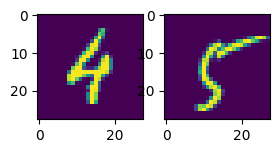

In [37]:
def get_digits(value):
    """
    Select two MNIST values from the testing data to feed to the fizzbuzz calculator.
    """
    
    # find and organize digits
    number_locations = {}

    for i in range(10):
        number_locations[i] = np.where(y_test == i)[0]

    tens = int(value / 10)
    ones = value % 10

    # pick an image from the list of digits
    first_digit  = number_locations[tens][np.random.choice(len(number_locations[tens]), size=1)][0]
    second_digit = number_locations[ones][np.random.choice(len(number_locations[ones]), size=1)][0]
    
    img0 = x_test[first_digit]
    img1 = x_test[second_digit]

    return np.expand_dims(img0, axis=0), np.expand_dims(img1, axis=0)


# Pick a random number
x = random.randint(0,100)

# retrieve two digit pictures
first_digit, second_digit = get_digits(x)

# Calculate fizzbuzz
res = super_model.predict([first_digit, second_digit])
print(res)
print("Fizz:", res[0][0])
print("Buzz:", res[0][1])

# display value 
fig, axes = plt.subplots(1,2,figsize=(3,6))
axes[0].imshow(first_digit[0])
axes[1].imshow(second_digit[0])
plt.show()

Run through all digits:

In [ ]:
for i in range(100):
    # retrieve two digit pictures
    first_digit, second_digit = get_digits(x)
    
    # Calculate fizzbuzz
    res = super_model.predict([first_digit, second_digit])
    print(i, "Fizz:", res[0][0], "Buzz:", res[0][1])